# 線形代数：正射影（Orthogonal Projections）

このノートブックでは、正射影（orthogonal projection）について基本から学びます。

## 目次
1. [正射影とは](#正射影とは)
2. [1次元への正射影](#1次元への正射影)
3. [高次元への正射影](#高次元への正射影)
4. [正射影の性質](#正射影の性質)
5. [正射影行列](#正射影行列)
6. [幾何学的な解釈と可視化](#幾何学的な解釈と可視化)
7. [実装例](#実装例)
8. [機械学習での応用例](#機械学習での応用例)


---

## 必要なライブラリのインポート


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm
import sys

# 1. Seabornの設定を最初に行う (重要)
# ※フォント設定の後に行うと、設定が上書きされて日本語が豆腐(□)になることがあります
sns.set_style("whitegrid")

# 日本語フォントの候補リスト (Mac, Windows, Linux/Colab向け)
jp_font_candidates = [
    'Hiragino Sans', 'Hiragino Kaku Gothic ProN', # Mac
    'Yu Gothic', 'Meiryo', 'MS Gothic',           # Windows
    'Noto Sans CJK JP', 'Noto Sans JP',           # Linux / Google Colab
    'AppleGothic', 'Arial Unicode MS'
]

# 2. フォントの適用ロジック
# システムにインストールされているフォント名を取得
available_fonts = set([f.name for f in fm.fontManager.ttflist])

selected_font = None

# 候補リストの中からインストールされているものを探す
for font_name in jp_font_candidates:
    if font_name in available_fonts:
        selected_font = font_name
        break

if selected_font:
    plt.rcParams['font.family'] = selected_font
    print(f"Success: Font set to '{selected_font}'")
else:
    # 見つからない場合はサンセリフ集合に候補を追加しておく（フォールバック）
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = jp_font_candidates + plt.rcParams['font.sans-serif']
    print("Warning: No specific Japanese font found. Using fallback configuration.")

# 3. マイナス記号の文字化け対策
plt.rcParams['axes.unicode_minus'] = False

# 4. 数式フォントの設定（通常の設定に戻す）
plt.rcParams['mathtext.default'] = 'regular'

# 5. プロットサイズの設定
plt.rcParams['figure.figsize'] = (10, 6)

# --- テスト描画（動作確認用） ---
# plt.plot([1, 2, 3], [1, 4, 9])
# plt.title("日本語テスト")
# plt.xlabel("X軸ラベル")
# plt.ylabel("Y軸ラベル")
# plt.show()

Success: Font set to 'Hiragino Sans'


---

## 正射影とは

**正射影（orthogonal projection）**は、ベクトルを部分空間上に「垂直に落とし込む」操作です。

### 直感的な理解

2次元平面上で、点から直線に「垂線を下ろす」操作が正射影です。このとき、元の点と射影された点の間の距離が最小になります。

### 数学的な定義

ベクトル $\mathbf{v} \in \mathbb{R}^n$ を部分空間 $U$ に正射影した結果を $\text{proj}_U(\mathbf{v})$ と表します。

正射影は以下の性質を満たします：

1. **射影されたベクトルは部分空間上にある**: $\text{proj}_U(\mathbf{v}) \in U$
2. **残差ベクトルは部分空間に直交**: $\mathbf{v} - \text{proj}_U(\mathbf{v}) \perp U$
3. **最小距離**: $\|\mathbf{v} - \text{proj}_U(\mathbf{v})\|$ は最小

### なぜ正射影が重要なのか？

- **最小二乗法**: データに最も近い直線や平面を見つける
- **次元削減**: 高次元データを低次元空間に射影
- **主成分分析（PCA）**: データの主要な方向を見つける
- **信号処理**: ノイズの除去や特徴抽出


---

## 1次元への正射影

最も基本的なケースは、ベクトルを1つのベクトル（直線）上に射影することです。

### 定義

ベクトル $\mathbf{v}$ を単位ベクトル $\mathbf{u}$ が張る直線に正射影する場合：

$$\text{proj}_{\mathbf{u}}(\mathbf{v}) = (\mathbf{v} \cdot \mathbf{u}) \mathbf{u}$$

$\mathbf{u}$ が単位ベクトルでない場合、まず正規化します：

$$\text{proj}_{\mathbf{u}}(\mathbf{v}) = \frac{\mathbf{v} \cdot \mathbf{u}}{\|\mathbf{u}\|^2} \mathbf{u} = \frac{\mathbf{v} \cdot \mathbf{u}}{\mathbf{u} \cdot \mathbf{u}} \mathbf{u}$$

### 内積の幾何学的意味

$\mathbf{v} \cdot \mathbf{u}$ は、$\mathbf{v}$ の $\mathbf{u}$ 方向への「成分」を表します。


In [8]:
# 1次元への正射影の実装
def project_onto_vector(v, u):
    """
    ベクトルvをベクトルuが張る直線に正射影

    Parameters:
    v: 射影されるベクトル
    u: 射影先のベクトル（方向）

    Returns:
    proj: 正射影されたベクトル
    scalar: スカラー係数 (v·u)/(u·u)
    """
    # uがゼロベクトルの場合
    u_norm_sq = np.dot(u, u)
    if u_norm_sq < 1e-10:
        return np.zeros_like(v, dtype=float), 0.0

    # スカラー係数を計算
    scalar = np.dot(v, u) / u_norm_sq

    # 正射影ベクトル
    proj = scalar * u

    return proj, scalar

# 例1: 基本的な正射影
v = np.array([3, 4])
u = np.array([1, 0])  # x軸方向

proj, scalar = project_onto_vector(v, u)

print("=== 例1: ベクトルをx軸に正射影 ===")
print(f"元のベクトル v = {v}")
print(f"射影先のベクトル u = {u}")
print(f"スカラー係数 (v·u)/(u·u) = {scalar:.4f}")
print(f"正射影 proj_u(v) = {proj}")
print(f"残差ベクトル v - proj = {v - proj}")
print(f"残差とuの内積（直交確認）: {np.dot(v - proj, u):.6f}")

# 例2: 斜めの方向への正射影
v2 = np.array([3, 4])
u2 = np.array([1, 1])  # 45度の方向
u2_normalized = u2 / np.linalg.norm(u2)  # 正規化

proj2, scalar2 = project_onto_vector(v2, u2)

print("\n=== 例2: ベクトルを斜めの方向に正射影 ===")
print(f"元のベクトル v = {v2}")
print(f"射影先のベクトル u = {u2}")
print(f"uの正規化: {u2_normalized}")
print(f"スカラー係数 (v·u)/(u·u) = {scalar2:.4f}")
print(f"正射影 proj_u(v) = {proj2}")
print(f"残差ベクトル v - proj = {v2 - proj2}")
print(f"残差とuの内積（直交確認）: {np.dot(v2 - proj2, u2):.6f}")


=== 例1: ベクトルをx軸に正射影 ===
元のベクトル v = [3 4]
射影先のベクトル u = [1 0]
スカラー係数 (v·u)/(u·u) = 3.0000
正射影 proj_u(v) = [3. 0.]
残差ベクトル v - proj = [0. 4.]
残差とuの内積（直交確認）: 0.000000

=== 例2: ベクトルを斜めの方向に正射影 ===
元のベクトル v = [3 4]
射影先のベクトル u = [1 1]
uの正規化: [0.70710678 0.70710678]
スカラー係数 (v·u)/(u·u) = 3.5000
正射影 proj_u(v) = [3.5 3.5]
残差ベクトル v - proj = [-0.5  0.5]
残差とuの内積（直交確認）: 0.000000


---

## 高次元への正射影

複数のベクトルが張る部分空間への正射影を考えます。

### 定義

ベクトル $\mathbf{v} \in \mathbb{R}^n$ を、正規直交基底 $\{\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_k\}$ が張る部分空間 $U$ に正射影する場合：

$$\text{proj}_U(\mathbf{v}) = \sum_{i=1}^{k} (\mathbf{v} \cdot \mathbf{u}_i) \mathbf{u}_i$$

### 正規直交基底でない場合

基底ベクトルが正規直交でない場合、まずGram-Schmidtの正規直交化を行うか、以下の公式を使用します：

$$\text{proj}_U(\mathbf{v}) = A(A^T A)^{-1} A^T \mathbf{v}$$

ここで、$A$ は部分空間 $U$ の基底ベクトルを列として持つ行列です。


In [9]:
# 高次元への正射影の実装
def project_onto_subspace(v, basis):
    """
    ベクトルvを基底ベクトルが張る部分空間に正射影

    Parameters:
    v: 射影されるベクトル
    basis: 部分空間の基底ベクトル（各行が基底ベクトル、または列ベクトルのリスト）

    Returns:
    proj: 正射影されたベクトル
    """
    # basisを行列に変換（各行が基底ベクトルと仮定）
    if isinstance(basis, list):
        A = np.array(basis).T  # 列ベクトルとして扱う
    else:
        A = basis.T if basis.shape[0] < basis.shape[1] else basis

    # 正規直交基底の場合の簡単な方法
    # 各基底ベクトルへの射影の和を計算
    proj = np.zeros_like(v, dtype=float)
    for i in range(A.shape[1]):
        u = A[:, i]
        u_norm_sq = np.dot(u, u)
        if u_norm_sq > 1e-10:
            proj += (np.dot(v, u) / u_norm_sq) * u

    return proj

def project_onto_subspace_matrix(v, A):
    """
    行列形式での正射影（より一般的な方法）
    proj = A(A^T A)^(-1) A^T v
    """
    ATA = A.T @ A
    if np.linalg.cond(ATA) > 1e10:  # 条件数が大きい場合
        # 疑似逆行列を使用
        A_pinv = np.linalg.pinv(A)
        return A @ (A_pinv @ v)
    else:
        return A @ np.linalg.solve(ATA, A.T @ v)

# 例: 2次元平面への正射影
v = np.array([1, 2, 3])
u1 = np.array([1, 0, 0])  # x軸方向
u2 = np.array([0, 1, 0])  # y軸方向

basis = np.array([u1, u2]).T  # 列ベクトルとして
proj = project_onto_subspace(v, basis)

print("=== 3次元ベクトルをxy平面に正射影 ===")
print(f"元のベクトル v = {v}")
print(f"基底ベクトル u1 = {u1}, u2 = {u2}")
print(f"正射影 proj(v) = {proj}")
print(f"残差ベクトル v - proj = {v - proj}")
print(f"残差とu1の内積: {np.dot(v - proj, u1):.6f}")
print(f"残差とu2の内積: {np.dot(v - proj, u2):.6f}")

# 行列形式での計算
proj_matrix = project_onto_subspace_matrix(v, basis)
print(f"\n行列形式での計算結果: {proj_matrix}")
print(f"結果が一致: {np.allclose(proj, proj_matrix)}")


=== 3次元ベクトルをxy平面に正射影 ===
元のベクトル v = [1 2 3]
基底ベクトル u1 = [1 0 0], u2 = [0 1 0]
正射影 proj(v) = [1. 2. 0.]
残差ベクトル v - proj = [0. 0. 3.]
残差とu1の内積: 0.000000
残差とu2の内積: 0.000000

行列形式での計算結果: [1. 2. 0.]
結果が一致: True


---

## 正射影の性質

正射影には重要な数学的性質があります。


In [10]:
# 正射影の性質を確認
v = np.array([3, 4, 5])
u = np.array([1, 1, 0])
u_normalized = u / np.linalg.norm(u)

proj, _ = project_onto_vector(v, u)
residual = v - proj

print("=== 正射影の性質の確認 ===\n")

# 性質1: 射影されたベクトルは部分空間上にある
# （この場合、uのスカラー倍になっている）
print("1. 射影されたベクトルは部分空間上にある:")
print(f"   proj = {proj}")
print(f"   projはuのスカラー倍: {np.allclose(proj, np.dot(v, u) / np.dot(u, u) * u)} ✓\n")

# 性質2: 残差ベクトルは部分空間に直交
print("2. 残差ベクトルは部分空間に直交:")
print(f"   残差 = {residual}")
print(f"   残差とuの内積: {np.dot(residual, u):.10f} ≈ 0 ✓\n")

# 性質3: 最小距離（ピタゴラスの定理）
norm_v_sq = np.dot(v, v)
norm_proj_sq = np.dot(proj, proj)
norm_residual_sq = np.dot(residual, residual)

print("3. ピタゴラスの定理（最小距離）:")
print(f"   ||v||² = {norm_v_sq:.4f}")
print(f"   ||proj||² = {norm_proj_sq:.4f}")
print(f"   ||residual||² = {norm_residual_sq:.4f}")
print(f"   ||v||² = ||proj||² + ||residual||²: {norm_v_sq:.4f} = {norm_proj_sq + norm_residual_sq:.4f} ✓\n")

# 性質4: 射影の線形性
v1 = np.array([1, 2])
v2 = np.array([3, 4])
u_test = np.array([1, 0])
alpha, beta = 2, 3

proj_v1, _ = project_onto_vector(v1, u_test)
proj_v2, _ = project_onto_vector(v2, u_test)
proj_combined, _ = project_onto_vector(alpha * v1 + beta * v2, u_test)

print("4. 線形性:")
print(f"   proj(αv1 + βv2) = {proj_combined}")
print(f"   α·proj(v1) + β·proj(v2) = {alpha * proj_v1 + beta * proj_v2}")
print(f"   等しい: {np.allclose(proj_combined, alpha * proj_v1 + beta * proj_v2)} ✓\n")

# 性質5: 射影の冪等性（同じ射影を2回適用しても結果は同じ）
proj_once, _ = project_onto_vector(v, u)
proj_twice, _ = project_onto_vector(proj_once, u)

print("5. 冪等性（射影を2回適用）:")
print(f"   1回目の射影: {proj_once}")
print(f"   2回目の射影: {proj_twice}")
print(f"   等しい: {np.allclose(proj_once, proj_twice)} ✓")


=== 正射影の性質の確認 ===

1. 射影されたベクトルは部分空間上にある:
   proj = [3.5 3.5 0. ]
   projはuのスカラー倍: True ✓

2. 残差ベクトルは部分空間に直交:
   残差 = [-0.5  0.5  5. ]
   残差とuの内積: 0.0000000000 ≈ 0 ✓

3. ピタゴラスの定理（最小距離）:
   ||v||² = 50.0000
   ||proj||² = 24.5000
   ||residual||² = 25.5000
   ||v||² = ||proj||² + ||residual||²: 50.0000 = 50.0000 ✓

4. 線形性:
   proj(αv1 + βv2) = [11.  0.]
   α·proj(v1) + β·proj(v2) = [11.  0.]
   等しい: True ✓

5. 冪等性（射影を2回適用）:
   1回目の射影: [3.5 3.5 0. ]
   2回目の射影: [3.5 3.5 0. ]
   等しい: True ✓


---

## 正射影行列

正射影は行列として表現できます。

### 定義

部分空間 $U$ への正射影行列 $P_U$ は：

$$P_U = A(A^T A)^{-1} A^T$$

ここで、$A$ は部分空間 $U$ の基底ベクトルを列として持つ行列です。

### 正規直交基底の場合

基底が正規直交の場合、$A^T A = I$ より：

$$P_U = A A^T$$

### 正射影行列の性質

1. **冪等性**: $P_U^2 = P_U$
2. **対称性**: $P_U^T = P_U$（直交射影の場合）
3. **固有値**: 0または1のみ


In [11]:
# 正射影行列の実装
def projection_matrix(basis):
    """
    部分空間への正射影行列を計算

    Parameters:
    basis: 部分空間の基底ベクトル（列ベクトルとして）

    Returns:
    P: 正射影行列
    """
    A = basis if isinstance(basis, np.ndarray) else np.array(basis).T

    # 正規直交基底かチェック
    ATA = A.T @ A
    if np.allclose(ATA, np.eye(ATA.shape[0])):
        # 正規直交基底の場合
        P = A @ A.T
    else:
        # 一般の場合
        try:
            P = A @ np.linalg.solve(ATA, A.T)
        except np.linalg.LinAlgError:
            # 特異行列の場合は疑似逆行列を使用
            A_pinv = np.linalg.pinv(A)
            P = A @ A_pinv

    return P

# 例1: 1次元への正射影行列
u = np.array([1, 0, 0])
u_normalized = u / np.linalg.norm(u)
P1 = projection_matrix(u_normalized.reshape(-1, 1))

print("=== 例1: x軸方向への正射影行列 ===")
print(f"基底ベクトル u = {u_normalized}")
print(f"正射影行列 P:")
print(P1)
print(f"\n性質の確認:")
print(f"  冪等性 P² = P: {np.allclose(P1 @ P1, P1)}")
print(f"  対称性 P^T = P: {np.allclose(P1.T, P1)}")

# 例2: 2次元平面への正射影行列
u1 = np.array([1, 0, 0])
u2 = np.array([0, 1, 0])
basis_2d = np.column_stack([u1, u2])
P2 = projection_matrix(basis_2d)

print("\n=== 例2: xy平面への正射影行列 ===")
print(f"基底ベクトル:")
print(f"  u1 = {u1}")
print(f"  u2 = {u2}")
print(f"正射影行列 P:")
print(P2)
print(f"\n性質の確認:")
print(f"  冪等性 P² = P: {np.allclose(P2 @ P2, P2)}")
print(f"  対称性 P^T = P: {np.allclose(P2.T, P2)}")

# 例3: 正射影行列を使った射影
v = np.array([1, 2, 3])
proj_v = P2 @ v

print(f"\n=== 例3: 正射影行列を使った射影 ===")
print(f"元のベクトル v = {v}")
print(f"P @ v = {proj_v}")
print(f"直接計算した射影: {project_onto_subspace(v, basis_2d)}")
print(f"結果が一致: {np.allclose(proj_v, project_onto_subspace(v, basis_2d))}")


=== 例1: x軸方向への正射影行列 ===
基底ベクトル u = [1. 0. 0.]
正射影行列 P:
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

性質の確認:
  冪等性 P² = P: True
  対称性 P^T = P: True

=== 例2: xy平面への正射影行列 ===
基底ベクトル:
  u1 = [1 0 0]
  u2 = [0 1 0]
正射影行列 P:
[[1 0 0]
 [0 1 0]
 [0 0 0]]

性質の確認:
  冪等性 P² = P: True
  対称性 P^T = P: True

=== 例3: 正射影行列を使った射影 ===
元のベクトル v = [1 2 3]
P @ v = [1 2 0]
直接計算した射影: [1. 2. 0.]
結果が一致: True


---

## 幾何学的な解釈と可視化

正射影の幾何学的な意味を可視化します。


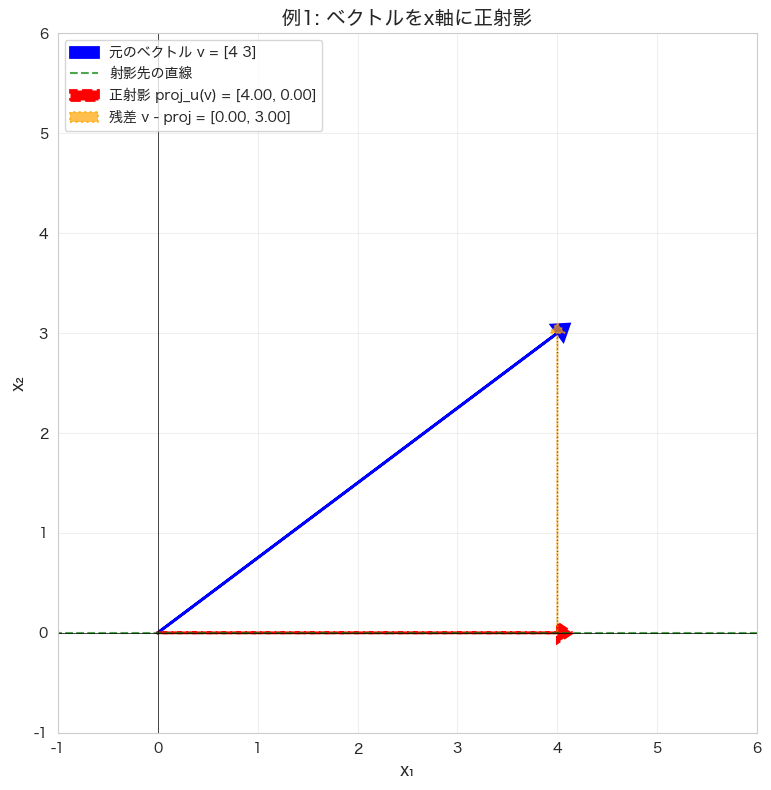

元のベクトル v = [4 3]
射影先のベクトル u = [1 0]
正射影 proj_u(v) = [4.0000, 0.0000]
スカラー係数 (v·u)/(u·u) = 4.0000
残差ベクトル = [0.0000, 3.0000]
残差とuの内積（直交確認）: 0.0000000000


In [12]:
# 2次元での正射影の可視化
def visualize_projection_2d(v, u, title="2次元での正射影"):
    """2次元ベクトルの正射影を可視化"""
    fig, ax = plt.subplots(figsize=(10, 8))

    # 正射影を計算
    proj, scalar = project_onto_vector(v, u)
    residual = v - proj

    # ベクトルを描画
    ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.15,
             fc='blue', ec='blue', linewidth=2, label=f'元のベクトル v = {v}')

    # 射影先の直線を描画
    t = np.linspace(-2, 2, 100)
    line_x = t * u[0] / np.linalg.norm(u) * 5
    line_y = t * u[1] / np.linalg.norm(u) * 5
    ax.plot(line_x, line_y, 'g--', linewidth=1.5, alpha=0.7, label='射影先の直線')

    # 正射影ベクトルを描画
    ax.arrow(0, 0, proj[0], proj[1], head_width=0.2, head_length=0.15,
             fc='red', ec='red', linewidth=2, linestyle='--',
             label=f'正射影 proj_u(v) = [{proj[0]:.2f}, {proj[1]:.2f}]')

    # 残差ベクトルを描画（点線）
    ax.arrow(proj[0], proj[1], residual[0], residual[1],
             head_width=0.15, head_length=0.1, fc='orange', ec='orange',
             linewidth=1.5, linestyle=':', alpha=0.7,
             label=f'残差 v - proj = [{residual[0]:.2f}, {residual[1]:.2f}]')

    # 垂線を描画
    ax.plot([v[0], proj[0]], [v[1], proj[1]], 'k:', linewidth=1, alpha=0.5)

    # 原点から射影点への点線
    ax.plot([0, proj[0]], [0, proj[1]], 'r:', linewidth=1, alpha=0.5)

    # グリッドと軸
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-1, 6)
    ax.set_aspect('equal')
    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend(loc='upper left', fontsize=10)

    plt.tight_layout()
    plt.show()

    # 情報を表示
    print(f"元のベクトル v = {v}")
    print(f"射影先のベクトル u = {u}")
    print(f"正射影 proj_u(v) = [{proj[0]:.4f}, {proj[1]:.4f}]")
    print(f"スカラー係数 (v·u)/(u·u) = {scalar:.4f}")
    print(f"残差ベクトル = [{residual[0]:.4f}, {residual[1]:.4f}]")
    print(f"残差とuの内積（直交確認）: {np.dot(residual, u):.10f}")

# 例1: x軸への正射影
v1 = np.array([4, 3])
u1 = np.array([1, 0])
visualize_projection_2d(v1, u1, "例1: ベクトルをx軸に正射影")


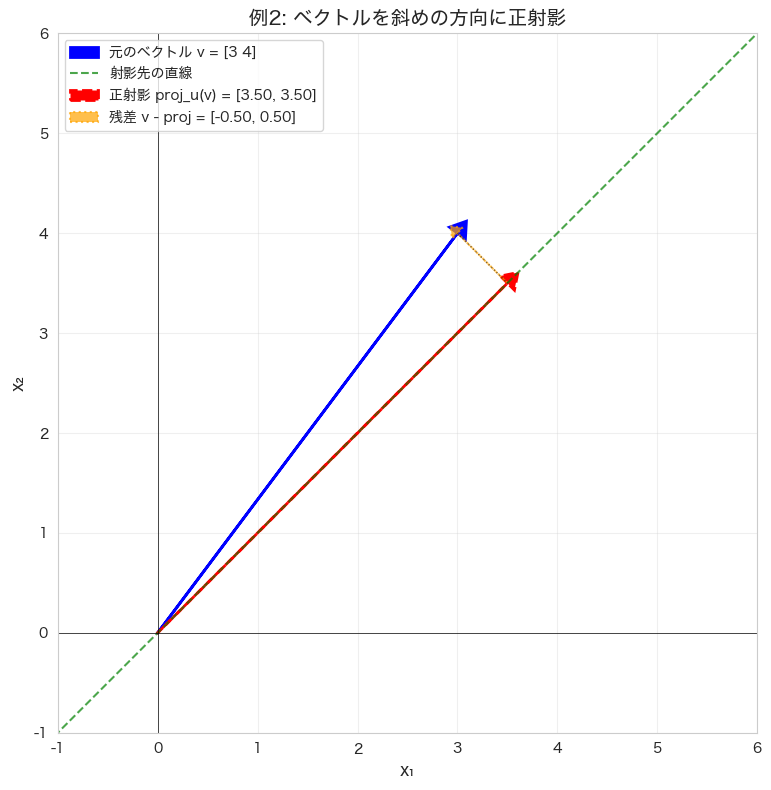

元のベクトル v = [3 4]
射影先のベクトル u = [1 1]
正射影 proj_u(v) = [3.5000, 3.5000]
スカラー係数 (v·u)/(u·u) = 3.5000
残差ベクトル = [-0.5000, 0.5000]
残差とuの内積（直交確認）: 0.0000000000


In [13]:
# 例2: 斜めの方向への正射影
v2 = np.array([3, 4])
u2 = np.array([1, 1])
visualize_projection_2d(v2, u2, "例2: ベクトルを斜めの方向に正射影")


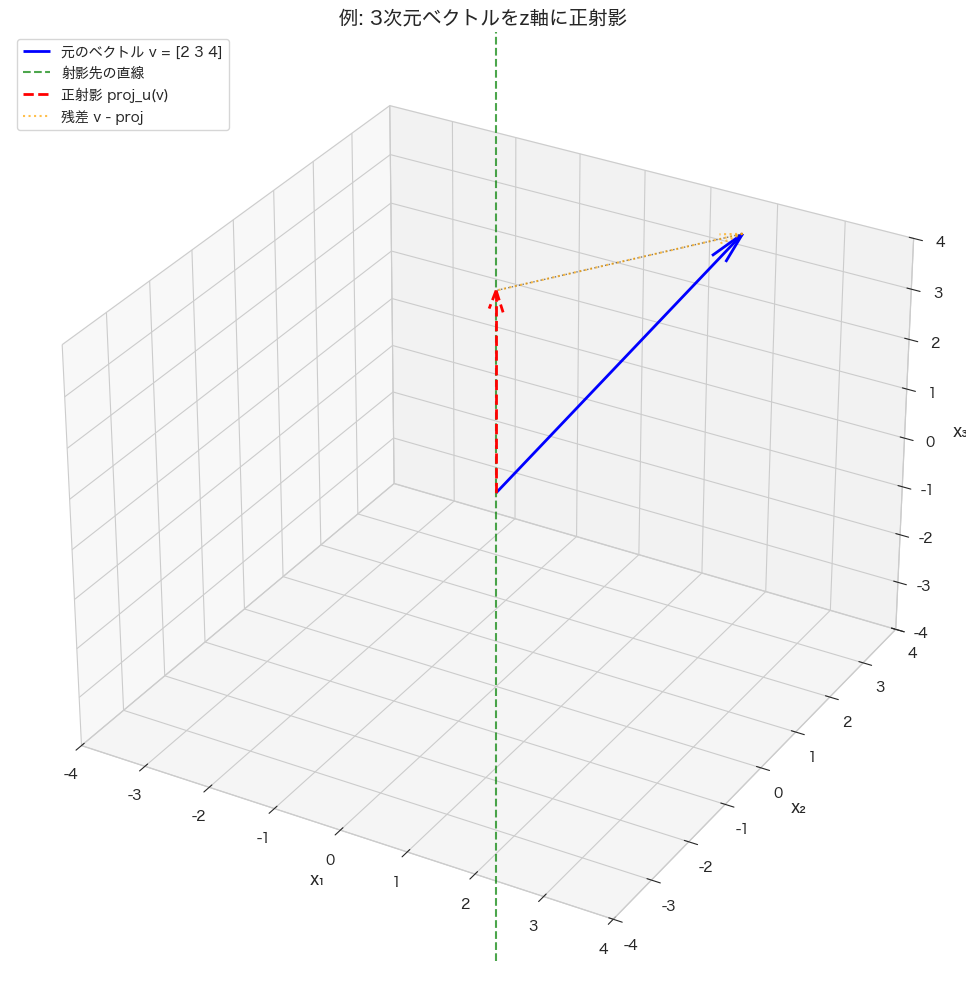

元のベクトル v = [2 3 4]
射影先のベクトル u = [0 0 1]
正射影 proj_u(v) = [0.0000, 0.0000, 4.0000]
残差ベクトル = [2.0000, 3.0000, 0.0000]
残差とuの内積（直交確認）: 0.0000000000


In [14]:
# 3次元での正射影の可視化
def visualize_projection_3d(v, u, title="3次元での正射影"):
    """3次元ベクトルの正射影を可視化"""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # 正射影を計算
    proj, scalar = project_onto_vector(v, u)
    residual = v - proj

    # 元のベクトル
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.1,
              linewidth=2, label=f'元のベクトル v = {v}')

    # 射影先の直線
    t = np.linspace(-2, 2, 100)
    line = t.reshape(-1, 1) * (u / np.linalg.norm(u)) * 5
    ax.plot(line[:, 0], line[:, 1], line[:, 2], 'g--', linewidth=1.5,
            alpha=0.7, label='射影先の直線')

    # 正射影ベクトル
    ax.quiver(0, 0, 0, proj[0], proj[1], proj[2], color='red',
              arrow_length_ratio=0.1, linewidth=2, linestyle='--',
              label=f'正射影 proj_u(v)')

    # 残差ベクトル
    ax.quiver(proj[0], proj[1], proj[2], residual[0], residual[1], residual[2],
              color='orange', arrow_length_ratio=0.1, linewidth=1.5,
              linestyle=':', alpha=0.7, label='残差 v - proj')

    # 垂線（点から直線への最短距離）
    ax.plot([v[0], proj[0]], [v[1], proj[1]], [v[2], proj[2]],
            'k:', linewidth=1, alpha=0.5)

    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_zlabel('x₃', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend(loc='upper left', fontsize=10)

    # 軸の範囲を設定
    max_val = max(np.max(np.abs(v)), np.max(np.abs(proj)), 3)
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.set_zlim([-max_val, max_val])

    plt.tight_layout()
    plt.show()

    print(f"元のベクトル v = {v}")
    print(f"射影先のベクトル u = {u}")
    print(f"正射影 proj_u(v) = [{proj[0]:.4f}, {proj[1]:.4f}, {proj[2]:.4f}]")
    print(f"残差ベクトル = [{residual[0]:.4f}, {residual[1]:.4f}, {residual[2]:.4f}]")
    print(f"残差とuの内積（直交確認）: {np.dot(residual, u):.10f}")

# 例: 3次元ベクトルをz軸に正射影
v3 = np.array([2, 3, 4])
u3 = np.array([0, 0, 1])
visualize_projection_3d(v3, u3, "例: 3次元ベクトルをz軸に正射影")


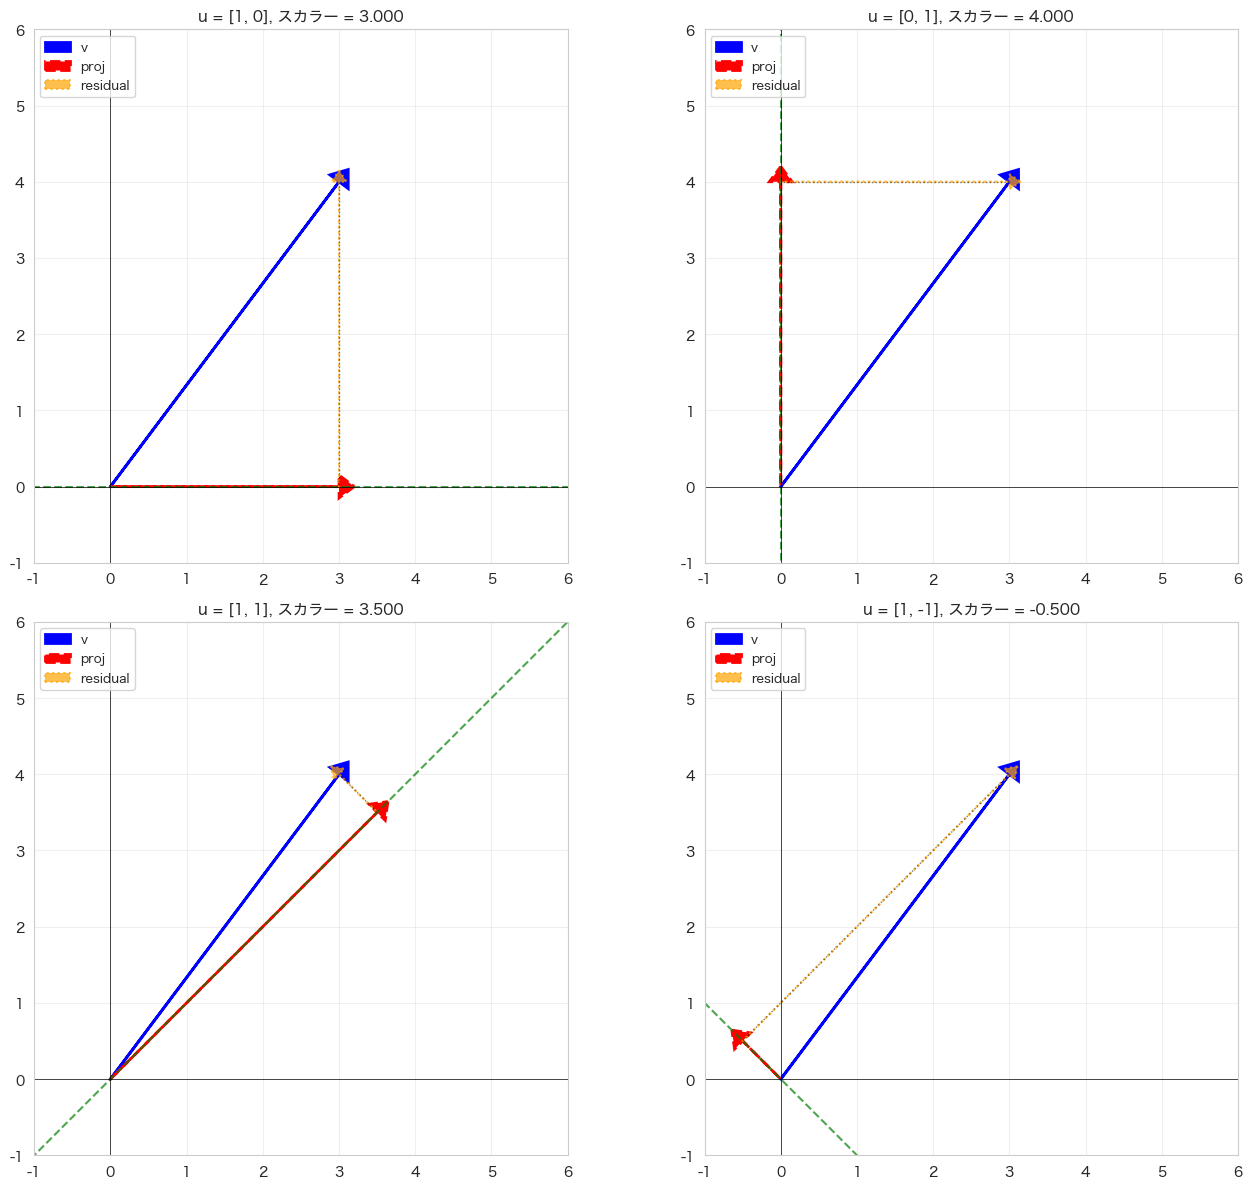

In [15]:
# 複数のベクトルへの射影の比較
def compare_projections():
    """異なる方向への射影を比較"""
    v = np.array([3, 4])

    # 異なる方向のベクトル
    directions = [
        np.array([1, 0]),      # x軸
        np.array([0, 1]),      # y軸
        np.array([1, 1]),      # 45度
        np.array([1, -1]),     # -45度
    ]

    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    for idx, u in enumerate(directions):
        ax = axes[idx]
        proj, scalar = project_onto_vector(v, u)
        residual = v - proj

        # 元のベクトル
        ax.arrow(0, 0, v[0], v[1], head_width=0.3, head_length=0.2,
                fc='blue', ec='blue', linewidth=2, label='v')

        # 射影先の直線
        t = np.linspace(-2, 2, 100)
        line = t.reshape(-1, 1) * (u / np.linalg.norm(u)) * 6
        ax.plot(line[:, 0], line[:, 1], 'g--', linewidth=1.5, alpha=0.7)

        # 正射影
        ax.arrow(0, 0, proj[0], proj[1], head_width=0.3, head_length=0.2,
                fc='red', ec='red', linewidth=2, linestyle='--', label='proj')

        # 残差
        ax.arrow(proj[0], proj[1], residual[0], residual[1],
                head_width=0.2, head_length=0.15, fc='orange', ec='orange',
                linewidth=1.5, linestyle=':', alpha=0.7, label='residual')

        # 垂線
        ax.plot([v[0], proj[0]], [v[1], proj[1]], 'k:', linewidth=1, alpha=0.5)

        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linewidth=0.5)
        ax.axvline(x=0, color='k', linewidth=0.5)
        ax.set_xlim(-1, 6)
        ax.set_ylim(-1, 6)
        ax.set_aspect('equal')
        ax.set_title(f'u = [{u[0]}, {u[1]}], スカラー = {scalar:.3f}', fontsize=11)
        ax.legend(loc='upper left', fontsize=9)

    plt.tight_layout()
    plt.show()

compare_projections()


---

## 実装例

実用的な正射影の実装クラスを作成します。


In [16]:
class OrthogonalProjection:
    """正射影を計算するクラス"""

    @staticmethod
    def project_onto_vector(v, u):
        """ベクトルvをベクトルuが張る直線に正射影"""
        u_norm_sq = np.dot(u, u)
        if u_norm_sq < 1e-10:
            return np.zeros_like(v, dtype=float), 0.0
        scalar = np.dot(v, u) / u_norm_sq
        return scalar * u, scalar

    @staticmethod
    def project_onto_subspace(v, basis):
        """ベクトルvを基底が張る部分空間に正射影"""
        if isinstance(basis, list):
            A = np.array(basis).T
        else:
            A = basis.T if basis.shape[0] < basis.shape[1] else basis

        proj = np.zeros_like(v, dtype=float)
        for i in range(A.shape[1]):
            u = A[:, i]
            u_norm_sq = np.dot(u, u)
            if u_norm_sq > 1e-10:
                proj += (np.dot(v, u) / u_norm_sq) * u
        return proj

    @staticmethod
    def projection_matrix(basis):
        """正射影行列を計算"""
        A = basis if isinstance(basis, np.ndarray) else np.array(basis).T

        ATA = A.T @ A
        if np.allclose(ATA, np.eye(ATA.shape[0])):
            return A @ A.T
        else:
            try:
                return A @ np.linalg.solve(ATA, A.T)
            except np.linalg.LinAlgError:
                A_pinv = np.linalg.pinv(A)
                return A @ A_pinv

    @staticmethod
    def gram_schmidt(vectors):
        """Gram-Schmidtの正規直交化"""
        vectors = np.array(vectors)
        if vectors.ndim == 1:
            vectors = vectors.reshape(1, -1)

        n = vectors.shape[0]
        orthonormal = []

        for i in range(n):
            v = vectors[i]
            # 既存の正規直交ベクトルへの射影を引く
            for u in orthonormal:
                v = v - np.dot(v, u) * u

            # 正規化
            norm = np.linalg.norm(v)
            if norm > 1e-10:
                orthonormal.append(v / norm)

        return np.array(orthonormal)

# 使用例
print("=== OrthogonalProjectionクラスの使用例 ===\n")

# 例1: 1次元への射影
v1 = np.array([3, 4, 5])
u1 = np.array([1, 0, 0])
proj1, scalar1 = OrthogonalProjection.project_onto_vector(v1, u1)
print(f"例1: ベクトルをx軸に射影")
print(f"  v = {v1}, u = {u1}")
print(f"  proj = {proj1}, スカラー = {scalar1:.4f}\n")

# 例2: 部分空間への射影
v2 = np.array([1, 2, 3])
basis2 = np.array([[1, 0, 0], [0, 1, 0]]).T
proj2 = OrthogonalProjection.project_onto_subspace(v2, basis2)
print(f"例2: ベクトルをxy平面に射影")
print(f"  v = {v2}")
print(f"  proj = {proj2}\n")

# 例3: Gram-Schmidtの正規直交化
vectors3 = np.array([[1, 1, 0], [1, 0, 1], [0, 1, 1]])
orthonormal3 = OrthogonalProjection.gram_schmidt(vectors3)
print(f"例3: Gram-Schmidtの正規直交化")
print(f"  元のベクトル:")
for i, vec in enumerate(vectors3):
    print(f"    v{i+1} = {vec}")
print(f"  正規直交化後:")
for i, vec in enumerate(orthonormal3):
    print(f"    u{i+1} = [{vec[0]:.4f}, {vec[1]:.4f}, {vec[2]:.4f}]")
    print(f"    ||u{i+1}|| = {np.linalg.norm(vec):.4f}")


=== OrthogonalProjectionクラスの使用例 ===

例1: ベクトルをx軸に射影
  v = [3 4 5], u = [1 0 0]
  proj = [3. 0. 0.], スカラー = 3.0000

例2: ベクトルをxy平面に射影
  v = [1 2 3]
  proj = [1. 2. 0.]

例3: Gram-Schmidtの正規直交化
  元のベクトル:
    v1 = [1 1 0]
    v2 = [1 0 1]
    v3 = [0 1 1]
  正規直交化後:
    u1 = [0.7071, 0.7071, 0.0000]
    ||u1|| = 1.0000
    u2 = [0.4082, -0.4082, 0.8165]
    ||u2|| = 1.0000
    u3 = [-0.5774, 0.5774, 0.5774]
    ||u3|| = 1.0000


### 1. 最小二乗法（Least Squares）

最小二乗法は、データ点に最も近い直線や平面を見つける問題で、正射影の概念が核心です。

#### 線形回帰

データ点 $(x_i, y_i)$ に対して、$y = ax + b$ の形で近似する場合：

$$\min_{a, b} \sum_{i=1}^{n} (y_i - (ax_i + b))^2$$

これは、ベクトル $\mathbf{y}$ を行列 $X$ の列空間に正射影する問題と等価です。


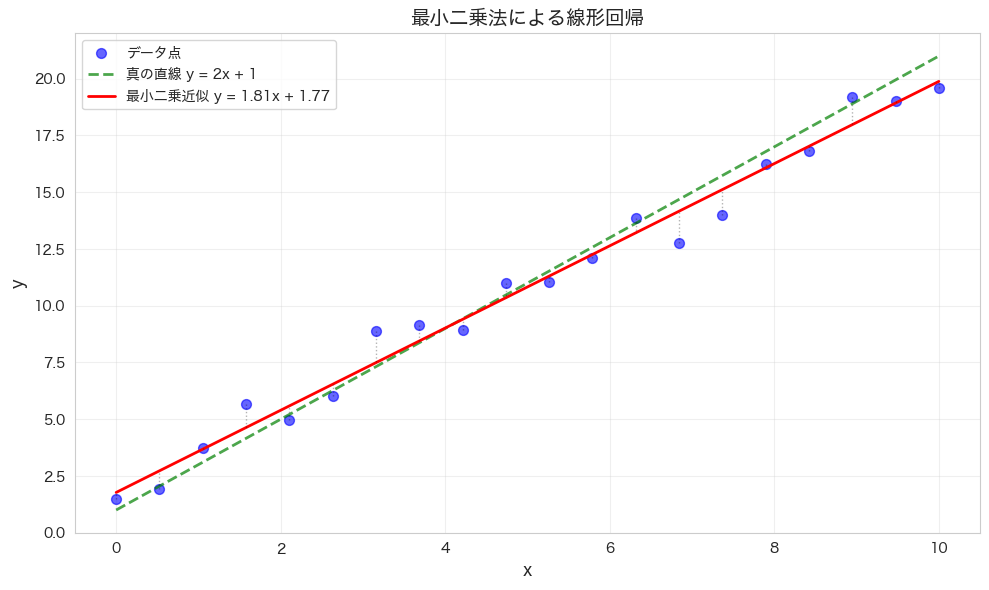

=== 最小二乗法の結果 ===
真のパラメータ: a = 2.0, b = 1.0
推定パラメータ: a = 1.8108, b = 1.7746
残差の二乗和: 10.9192

=== 正射影の観点 ===
yをXの列空間に正射影した結果が y_pred です
残差ベクトル y - y_pred はXの列空間に直交します


In [17]:
# 最小二乗法の例：線形回帰
def least_squares_example():
    """最小二乗法による線形回帰の例"""
    np.random.seed(42)

    # データを生成
    x = np.linspace(0, 10, 20)
    y_true = 2 * x + 1
    y = y_true + np.random.normal(0, 1, len(x))  # ノイズを追加

    # 設計行列を作成
    X = np.column_stack([x, np.ones(len(x))])  # [x, 1]

    # 最小二乗解を計算（正射影を使用）
    # β = (X^T X)^(-1) X^T y
    XTX = X.T @ X
    XTy = X.T @ y
    beta = np.linalg.solve(XTX, XTy)

    # 予測値（yのXの列空間への正射影）
    y_pred = X @ beta

    # 可視化
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.6, s=50, label='データ点', color='blue')
    plt.plot(x, y_true, 'g--', linewidth=2, label='真の直線 y = 2x + 1', alpha=0.7)
    plt.plot(x, y_pred, 'r-', linewidth=2, label=f'最小二乗近似 y = {beta[0]:.2f}x + {beta[1]:.2f}')

    # 残差を描画
    for i in range(len(x)):
        plt.plot([x[i], x[i]], [y[i], y_pred[i]], 'k:', linewidth=1, alpha=0.3)

    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title('最小二乗法による線形回帰', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("=== 最小二乗法の結果 ===")
    print(f"真のパラメータ: a = 2.0, b = 1.0")
    print(f"推定パラメータ: a = {beta[0]:.4f}, b = {beta[1]:.4f}")
    print(f"残差の二乗和: {np.sum((y - y_pred)**2):.4f}")

    # 正射影の観点から説明
    print(f"\n=== 正射影の観点 ===")
    print(f"yをXの列空間に正射影した結果が y_pred です")
    print(f"残差ベクトル y - y_pred はXの列空間に直交します")

least_squares_example()


### 2. 主成分分析（PCA）

PCAは、データを主要な方向（主成分）に射影することで次元削減を行います。各主成分は、データの分散を最大化する方向です。


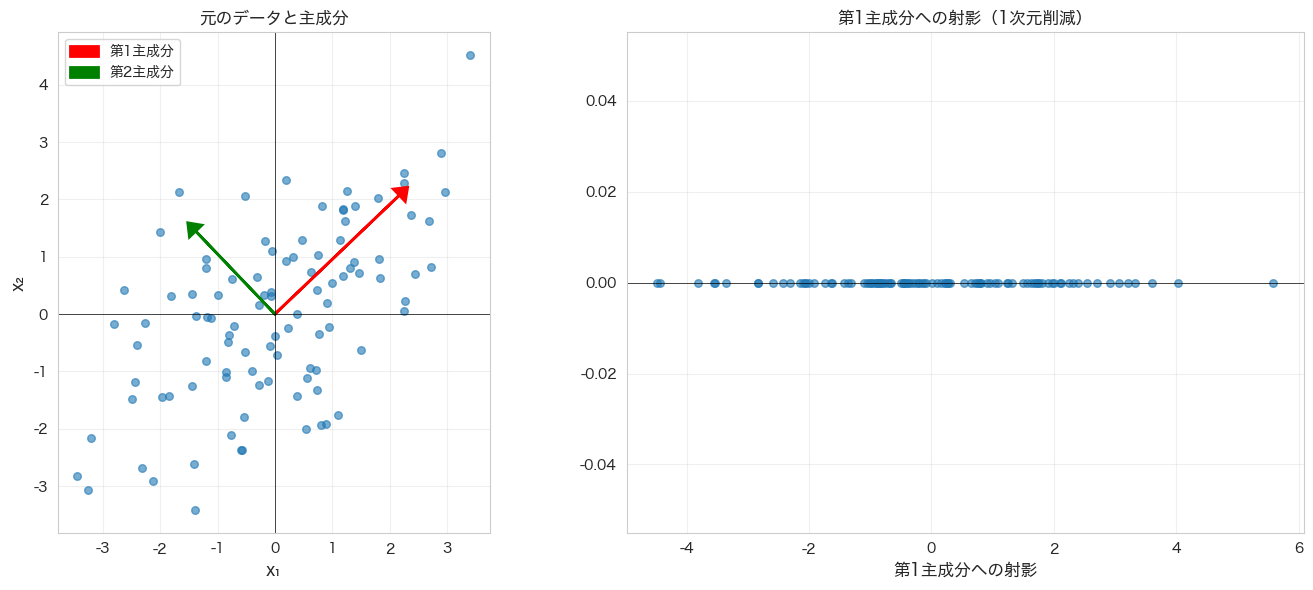

=== PCAの結果 ===
第1主成分: [0.7233, 0.6906]
第1主成分の固有値（分散）: 3.6678
第2主成分: [-0.6906, 0.7233]
第2主成分の固有値（分散）: 0.9963
第1主成分が説明する分散の割合: 78.64%


In [18]:
# PCAの簡単な例
def pca_example():
    """PCAによる次元削減の例"""
    np.random.seed(42)

    # 2次元データを生成（相関あり）
    mean = [0, 0]
    cov = [[3, 2], [2, 3]]
    data = np.random.multivariate_normal(mean, cov, 100)

    # データを中心化
    data_centered = data - np.mean(data, axis=0)

    # 共分散行列を計算
    cov_matrix = np.cov(data_centered.T)

    # 固有値分解
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # 固有値の大きい順にソート
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # 第1主成分への射影
    pc1 = eigenvectors[:, 0]
    projections = data_centered @ pc1

    # 可視化
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 元のデータと主成分
    axes[0].scatter(data_centered[:, 0], data_centered[:, 1], alpha=0.6, s=30)
    axes[0].arrow(0, 0, pc1[0] * 3, pc1[1] * 3, head_width=0.3, head_length=0.2,
                  fc='red', ec='red', linewidth=2, label='第1主成分')
    if len(eigenvectors[0]) > 1:
        pc2 = eigenvectors[:, 1]
        axes[0].arrow(0, 0, pc2[0] * 2, pc2[1] * 2, head_width=0.3, head_length=0.2,
                      fc='green', ec='green', linewidth=2, label='第2主成分')

    axes[0].set_xlabel('x₁', fontsize=12)
    axes[0].set_ylabel('x₂', fontsize=12)
    axes[0].set_title('元のデータと主成分', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    axes[0].axhline(y=0, color='k', linewidth=0.5)
    axes[0].axvline(x=0, color='k', linewidth=0.5)
    axes[0].set_aspect('equal')
    axes[0].legend()

    # 第1主成分への射影
    axes[1].scatter(projections, np.zeros_like(projections), alpha=0.6, s=30)
    axes[1].set_xlabel('第1主成分への射影', fontsize=12)
    axes[1].set_ylabel('', fontsize=12)
    axes[1].set_title('第1主成分への射影（1次元削減）', fontsize=12)
    axes[1].grid(True, alpha=0.3)
    axes[1].axhline(y=0, color='k', linewidth=0.5)

    plt.tight_layout()
    plt.show()

    print("=== PCAの結果 ===")
    print(f"第1主成分: [{pc1[0]:.4f}, {pc1[1]:.4f}]")
    print(f"第1主成分の固有値（分散）: {eigenvalues[0]:.4f}")
    if len(eigenvalues) > 1:
        print(f"第2主成分: [{eigenvectors[0, 1]:.4f}, {eigenvectors[1, 1]:.4f}]")
        print(f"第2主成分の固有値（分散）: {eigenvalues[1]:.4f}")
        print(f"第1主成分が説明する分散の割合: {eigenvalues[0] / np.sum(eigenvalues):.2%}")

pca_example()


### 3. 信号処理：ノイズ除去

正射影は、信号からノイズを除去する際にも使用されます。信号を適切な部分空間に射影することで、ノイズ成分を除去できます。


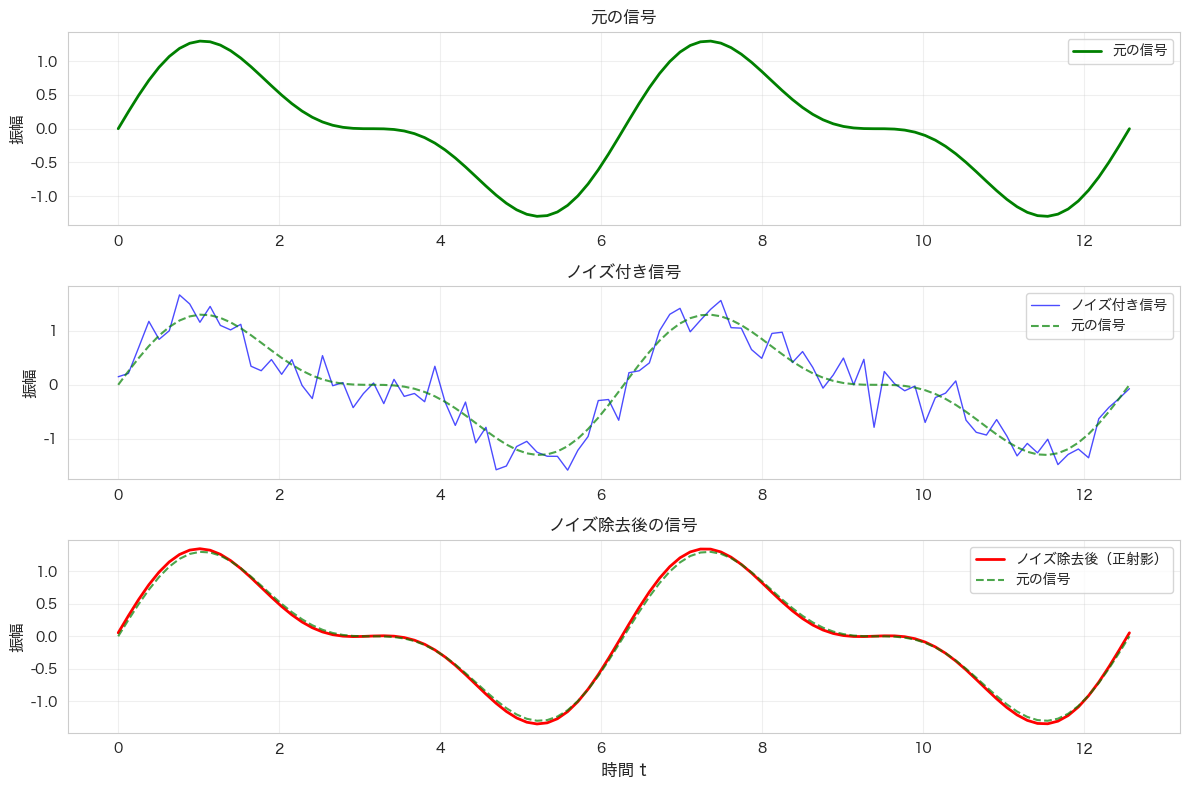

=== ノイズ除去の結果 ===
元の信号のノルム: 7.8661
ノイズ付き信号のノルム: 8.5367
ノイズ除去後信号のノルム: 8.0982
元の信号との誤差（ノイズ付き）: 2.7287
元の信号との誤差（ノイズ除去後）: 0.3893


In [19]:
# 信号処理の例：ノイズ除去
def signal_denoising_example():
    """正射影を使ったノイズ除去の例"""
    np.random.seed(42)

    # 元の信号（低周波成分）
    t = np.linspace(0, 4*np.pi, 100)
    signal_true = np.sin(t) + 0.5 * np.sin(2*t)

    # ノイズを追加
    noise = np.random.normal(0, 0.3, len(t))
    signal_noisy = signal_true + noise

    # 低周波基底関数で近似（フーリエ級数の最初の数項）
    # sin(t), cos(t), sin(2t), cos(2t) の線形結合で近似
    basis_functions = [
        np.sin(t),
        np.cos(t),
        np.sin(2*t),
        np.cos(2*t)
    ]

    # 基底を行列に変換
    A = np.column_stack(basis_functions)

    # 信号を基底が張る部分空間に正射影（ノイズ除去）
    signal_denoised = OrthogonalProjection.project_onto_subspace(signal_noisy, A)

    # 可視化
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(t, signal_true, 'g-', linewidth=2, label='元の信号')
    plt.ylabel('振幅', fontsize=11)
    plt.title('元の信号', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(3, 1, 2)
    plt.plot(t, signal_noisy, 'b-', linewidth=1, alpha=0.7, label='ノイズ付き信号')
    plt.plot(t, signal_true, 'g--', linewidth=1.5, alpha=0.7, label='元の信号')
    plt.ylabel('振幅', fontsize=11)
    plt.title('ノイズ付き信号', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(3, 1, 3)
    plt.plot(t, signal_denoised, 'r-', linewidth=2, label='ノイズ除去後（正射影）')
    plt.plot(t, signal_true, 'g--', linewidth=1.5, alpha=0.7, label='元の信号')
    plt.xlabel('時間 t', fontsize=12)
    plt.ylabel('振幅', fontsize=11)
    plt.title('ノイズ除去後の信号', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("=== ノイズ除去の結果 ===")
    print(f"元の信号のノルム: {np.linalg.norm(signal_true):.4f}")
    print(f"ノイズ付き信号のノルム: {np.linalg.norm(signal_noisy):.4f}")
    print(f"ノイズ除去後信号のノルム: {np.linalg.norm(signal_denoised):.4f}")
    print(f"元の信号との誤差（ノイズ付き）: {np.linalg.norm(signal_noisy - signal_true):.4f}")
    print(f"元の信号との誤差（ノイズ除去後）: {np.linalg.norm(signal_denoised - signal_true):.4f}")

signal_denoising_example()


---

## まとめ

このノートブックでは、正射影の基本概念から応用まで学びました：

1. **正射影の定義**: ベクトルを部分空間上に「垂直に落とし込む」操作
2. **1次元への正射影**: $\text{proj}_{\mathbf{u}}(\mathbf{v}) = \frac{\mathbf{v} \cdot \mathbf{u}}{\mathbf{u} \cdot \mathbf{u}} \mathbf{u}$
3. **高次元への正射影**: 複数の基底ベクトルが張る部分空間への射影
4. **正射影の性質**:
   - 射影されたベクトルは部分空間上にある
   - 残差ベクトルは部分空間に直交
   - 最小距離を実現
   - 冪等性と線形性
5. **正射影行列**: $P_U = A(A^T A)^{-1} A^T$
6. **機械学習での応用**:
   - 最小二乗法（線形回帰）
   - 主成分分析（PCA）
   - 信号処理（ノイズ除去）

### 練習問題

1. ベクトル $\mathbf{v} = (3, 4, 5)$ をベクトル $\mathbf{u} = (1, 1, 1)$ が張る直線に正射影してください。
2. ベクトル $\mathbf{v} = (1, 2, 3)$ をxy平面（$z = 0$）に正射影してください。
3. 正射影行列 $P$ が冪等性 $P^2 = P$ を満たすことを確認してください。
4. 最小二乗法で、データ点 $(1, 2), (2, 3), (3, 5)$ に最も近い直線 $y = ax + b$ を求めてください。

### 参考文献

- "Mathematics for Machine Learning" by Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong
- "Linear Algebra Done Right" by Sheldon Axler
- "Introduction to Linear Algebra" by Gilbert Strang
